# **2019 Gender Pay Gap**

The gender pay gap is currently a well known phenomenon with research indicating men receive higher pay on average compared to women.  I will explore this concept further by running statistical tests on this [Kaggle dataset](https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap) that scraped 2019 salary information from Glassdoor. This dataset contains 1,000 records, collecting data on job title, gender, age, performance evaluation, education, department, seniority, base pay, and bonuses.

In addition to performing statistical tests observing if there is a significant difference in average pay between men and women, I will also look at the additional variable of age to understand if there is also a statistically significant difference in mean pay between men and women within different age groups as well.

The following hypotheses are tested in this Notebook:

**Hypothesis Test #1**

*   **Null:**  There will not be a significant difference in average pay between men and women.
*   **Alternate:**  There will be a significant difference in average pay between men and women.

**Hypothesis Test #2a**

*   **Null:**  There will not be a significant difference in average pay between men and women between the ages of 18-41.
*   **Alternate:**  There will be a significant difference in average pay between men and women between the ages of 18-41.

**Hypothesis Test #2b**

*   **Null:**  There will not be a significant difference in average pay between men and women between the ages of 42-65.
*   **Alternate:**  There will be a significant difference in average pay between men and women between the ages of 42-65.

Following my analysis of the statistical tests on these hypotheses, I will address the limitations of the study (including its restricted definition of gender), and the next steps important to consider in future research.


# **Table of Contents**

>[Pre-Hypothesis Testing](#scrollTo=XVOdb7fKtrtb)

>[Hypothesis Test #1](#scrollTo=UQPZEuG1KoHI)

>[Findings for Hypothesis Test #1](#scrollTo=os9eVAL6NVWc)

>[Hypothesis Test #2a](#scrollTo=bPglpAFogYpS)

>[Findings for Hypothesis Test #2a](#scrollTo=8sff9QfN_I0T)

>[Hypothesis Test #2b](#scrollTo=Qj_DidW6_SWM)

>[Findings for Hypothesis Test #2b](#scrollTo=UySlanFKGRYF)

>[Conclusion](#scrollTo=Dv5LVI-21hwg)



In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
# Import libraries and read in the GDrive-mounted CSV

import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

df = pd.read_csv('/content/gdrive/My Drive/Datasets/GenderPayGap.csv')
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [46]:
# Find the row count to know what our population for this dataset is

df.shape

(1000, 9)

In [47]:
# Explore the nine columns and their datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [48]:
# We have 1000 rows with 0 reported null values
# Check to see if any rows have text representing missing values, and that the data in each row is logical for the column/datatype 
  # (Select interactive table for a complete look at the dataframe)

df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


# **Pre-Hypothesis Testing**

Before running statistical tests on my hypotheses, I will look for a normal distribution of the data. This initial testing will help  ensure the financial data was collected randomly and without bias, and will also confirm an even spread of gender and age data to eliminate the possibility of skewed results.

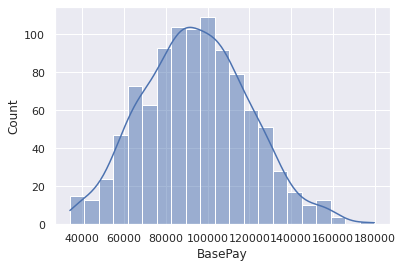

In [49]:
# First, because I am utilizing both BasePay and Bonus data for my statistical testing, I need to find a normal distribution 
# of each variable to confirm random selection and a lack of bias in the data.

# BasePay
sns.histplot(x='BasePay', data=df, kde=True)

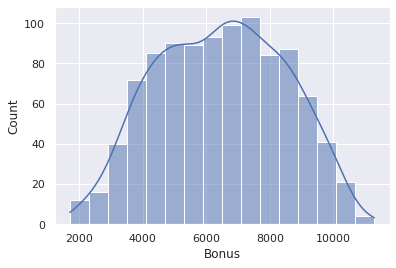

In [50]:
# Bonus

sns.histplot(x='Bonus', data=df, kde=True)

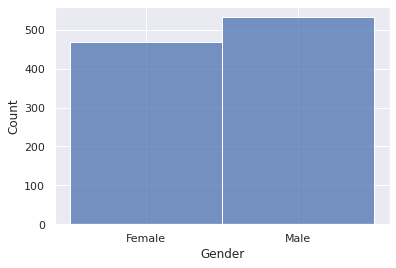

In [51]:
# Second, I need visualize the population of men and women.  An even split in the population between the two indicates randomly 
# collected data, and helps prevent a skew in the results towards one gender.

sns.histplot(x='Gender', data=df)

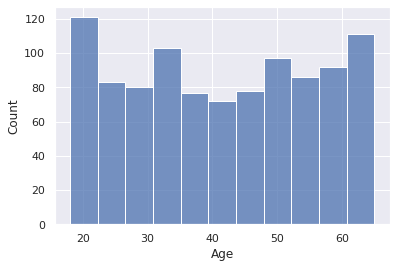

In [52]:
# Third, I am also looking for an even population spread across all ages.

sns.histplot(x='Age', data=df)

**Pre-Hypothesis Results**

*   The BasePay variable shows a strong normal distribution.
*   Bonus shows a normal distribution, though not as shaped as BasePay.
*   Gender shows an almost even split between men and women.  
*   For age, a small spike occurs in the two extremes of the age range, but generally indicates an even spread.

# **Hypothesis Test #1**

*   **Null:**  There will not be a significant difference in average pay between men and women.
*   **Alternate:**  There will be a significant difference in average pay between men and women.

Before we can compare the pay between men and women for the first hypothesis, we need to define what "pay" is referring to.  For this research, I am combining both base pay and bonuses to look at the total pay an individual receives.  This will be the pay figure I use to test in all of my hypotheses.

In [53]:
# Create a new column "TotalPay" that combines BasePay and Bonus

df = df.assign(TotalPay = df.BasePay + df.Bonus)
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


In [54]:
# In order to compare the pay between men and women, we need to create a dataframe for each reported gender

# Isolate the rows for women

women_df = df.iloc[(df['Gender'] == 'Female').values]
women_df.info()
women_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 995
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   468 non-null    object
 1   Gender     468 non-null    object
 2   Age        468 non-null    int64 
 3   PerfEval   468 non-null    int64 
 4   Education  468 non-null    object
 5   Dept       468 non-null    object
 6   Seniority  468 non-null    int64 
 7   BasePay    468 non-null    int64 
 8   Bonus      468 non-null    int64 
 9   TotalPay   468 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 40.2+ KB


,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
5,IT,Female,20,5,PhD,Operations,4,70890,10126,81016
6,Graphic Designer,Female,20,5,College,Sales,4,67585,10541,78126
8,Graphic Designer,Female,33,5,High School,Engineering,5,112976,9836,122812


In [55]:
# Isolate the rows for men

men_df = df.iloc[(df['Gender'] == 'Male').values]
men_df.info()
men_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 1 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   532 non-null    object
 1   Gender     532 non-null    object
 2   Age        532 non-null    int64 
 3   PerfEval   532 non-null    int64 
 4   Education  532 non-null    object
 5   Dept       532 non-null    object
 6   Seniority  532 non-null    int64 
 7   BasePay    532 non-null    int64 
 8   Bonus      532 non-null    int64 
 9   TotalPay   532 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 45.7+ KB


,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
7,Software Engineer,Male,18,4,PhD,Engineering,5,97523,10240,107763
10,Graphic Designer,Male,24,5,PhD,Engineering,5,102261,10212,112473


Now that I have the data organized by gender and an assigned column for TotalPay, I will run a t-test to compare the total pay means between men and women to see if there is a statistical difference.  I am also calculating the standard error and confidence intervals at 95%.

In [56]:
# Run t-test to compare the pay means between men and women

stats.ttest_ind(men_df['TotalPay'], women_df['TotalPay'])

Ttest_indResult(statistic=5.407461816876623, pvalue=8.000016978237565e-08)

In [57]:
from pandas.compat.numpy.function import MEDIAN_DEFAULTS
# Calculate the sample size, mean, and variance for each sample

sample_1_n = women_df.shape[0]
sample_2_n = men_df.shape[0]
sample_1_mean = women_df['TotalPay'].mean()
sample_2_mean = men_df['TotalPay'].mean()
sample_1_var = women_df['TotalPay'].var()
sample_2_var = men_df['TotalPay'].var()

In [58]:
# Calculate the standard error and compute confidence intervals

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 5429.219221633583 and 11574.475528061143.


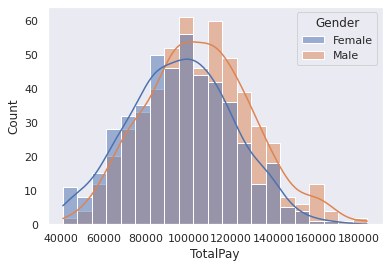

In [59]:
# Visualize the relationship between men and women pay means

sns.set_style("dark")
sns.despine()

sns.histplot(x='TotalPay', hue='Gender', data=df, kde=True)

# Findings for Hypothesis Test #1



*   Reject the null that there is no significant difference in population means between the salary of men and women 
*   The difference is significant at p < 0.05
*   With 95% confidence, the difference is between 5,429.22 and 11,574.48


> The statistical analysis indicates that there is a significant difference in salaries between men and women in this 2019 dataset.  

> The p-value indicates that there is less than a 5% chance of observing a difference in pay as large as I observed, even if there was no difference in the mean pay between men and women (if the null hypothesis was true). 

> With 95% confidence, the true difference in salary between men and women is between 5,429.22 - 11,574.48, with men holding the higher average salary.










# **Hypothesis Test #2a**

*   **Null:**  There will not be a significant difference in average pay between men and women between the ages of 18-41.
*   **Alternate:**  There will be a significant difference in average pay between men and women between the ages of 18-41.

Determining which age groups to test for Hypothesis #2a and #2b was decided by two main factors:  Population count of the age groups in the sample, and by external research on the age of peak salaries by gender.

> First, the age range of 18-41 accounts for exactly half of the age groups represented (there are 48 unique ages accounted for between the reported range of 18-65).  I calculated the populations for ranges that extended to age 42, 43, and 44, however, the difference in populations between men and women stayed relatively the same in all age ranges I looked at up through the mid 40's.  Therefore, I kept an even age range split.

> Second, outside research indicates women may hit their peak salary in their early 40's, whereas men continue to build their salaries and achieve their highest pay by their mid 50's.  I want to explore this observation by using the early 40's to divide the data among the salaries of men and women to understand if that observation in significant pay difference by age is also reflected in this dataset. 

In [60]:
# Create a df for women between the ages of 18-41
# Use the previous dataframes that filtered by gender

# Pull up a section of the table to ensure the correct ages have been selected

upto41_women_df = women_df.iloc[(women_df['Age'] <= 41).values]

upto41_women_df.tail()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
910,Graphic Designer,Female,33,1,High School,Sales,1,63914,3521,67435
913,Driver,Female,22,1,High School,Administration,1,60026,4605,64631
914,Marketing Associate,Female,41,1,PhD,Management,5,108587,4275,112862
941,IT,Female,32,2,High School,Engineering,1,59377,5236,64613
942,Marketing Associate,Female,38,1,PhD,Engineering,2,76726,4204,80930


In [61]:
# Count the number of rows (sample population)

upto41_women_df.shape

(226, 10)

In [62]:
# Create a df for men between the ages of 18-41
# Use the previous dataframes that filtered by gender

# Pull up a section of the table to ensure the correct ages have been selected

upto41_men_df = men_df.iloc[(men_df['Age'] <= 41).values]
upto41_men_df.tail(15)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
879,IT,Male,31,1,Masters,Sales,2,93358,3223,96581
884,Financial Analyst,Male,39,2,College,Sales,1,61609,3738,65347
888,Software Engineer,Male,29,1,High School,Sales,1,86650,3518,90168
890,Manager,Male,41,1,Masters,Sales,2,119794,3712,123506
893,Financial Analyst,Male,29,1,Masters,Operations,2,84725,3274,87999
897,Driver,Male,33,1,High School,Management,1,59493,3955,63448
903,Data Scientist,Male,37,1,PhD,Administration,2,78836,3588,82424
918,Software Engineer,Male,36,1,Masters,Operations,1,86375,3368,89743
919,IT,Male,31,1,College,Operations,1,49449,4149,53598
931,IT,Male,36,1,High School,Sales,4,109832,3528,113360


In [63]:
# Count the number of rows (sample population)

upto41_men_df.shape

(279, 10)

Now that the data is divided by the age range 18-41 by gender, we can run a t-test to compare the pay means between men and women within these ages to see if there is a statistical difference.  I am also again calculating the standard error and confidence intervals at 95%.

In [64]:
# Run t-test to compare the pay means between men and women

stats.ttest_ind(upto41_men_df['TotalPay'], upto41_women_df['TotalPay'])

Ttest_indResult(statistic=4.341558829292817, pvalue=1.711375675903681e-05)

In [65]:
# Calculate the sample size, mean, and variance for each sample

sample_1_n2 = upto41_women_df.shape[0]
sample_2_n2 = upto41_men_df.shape[0]
sample_1_mean2 = upto41_women_df['TotalPay'].mean()
sample_2_mean2 = upto41_men_df['TotalPay'].mean()
sample_1_var2 = upto41_women_df['TotalPay'].var()
sample_2_var2 = upto41_men_df['TotalPay'].var()

In [66]:
# Calculate the standard error and compute confidence intervals

std_err_difference2 = math.sqrt((sample_1_var2/sample_1_n2)+(sample_2_var2/sample_2_n2))

mean_difference2 = sample_2_mean2 - sample_1_mean2

margin_of_error2 = 1.96 * std_err_difference2
ci_lower2 = mean_difference2 - margin_of_error2
ci_upper2 = mean_difference2 + margin_of_error2

print("The difference in means at the 95% confidence interval is between "+str(ci_lower2)+" and "+str(ci_upper2)+".")

The difference in means at the 95% confidence interval is between 4503.4911039334975 and 11898.94011375295.


In [67]:
# In order to visualize the relationship between men and women pay means by the newly introduced variable of age, I need to
# create a new dataframe that includes only the individuals within the 18-41 age range

# Adding the number of rows in the upto41_women_df + upto41_men_df should equal the number of rows in this new dataframe (505)

upto41_df = df.iloc[(df['Age'] <= 41).values]
upto41_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 965
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   505 non-null    object
 1   Gender     505 non-null    object
 2   Age        505 non-null    int64 
 3   PerfEval   505 non-null    int64 
 4   Education  505 non-null    object
 5   Dept       505 non-null    object
 6   Seniority  505 non-null    int64 
 7   BasePay    505 non-null    int64 
 8   Bonus      505 non-null    int64 
 9   TotalPay   505 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 43.4+ KB


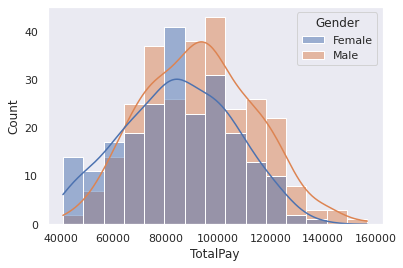

In [68]:
# Visualize the relationship between men and women pay means by age using our new datafram

sns.histplot(x='TotalPay', hue='Gender', data=upto41_df, kde=True)

# Findings for Hypothesis Test #2a

*   Reject the null that there is no significant difference in population means between the salary of men and women between the ages of 18-41
*   The difference is significant at p < 0.05
*   With 95% confidence, the difference is between 4,503.49 and 11,898.94



> There is also a significant difference in salaries between men and women who are between the ages of 18-41.

> The p-value indicates that there is less than a 5% chance of observing a difference in pay this large, even if there was no difference in the mean pay between men and women.

> With 95% confidence, the true difference in salary between men and women is between 4,503.49 and 11,898.94, with men holding the higher average salary.





# **Hypothesis Test #2b**

*   **Null:**  There will not be a significant difference in average pay between men and women between the ages of 42-65.
*   **Alternate:**  There will be a significant difference in average pay between men and women between the ages of 42-65.

After testing for a significant difference in pay within the ages 18-41, the next step is perfoming the same analysis on mean pay between men and women for ages spanning 42-65.

In [69]:
# Create a df for women between the ages of 42-65
# Use the intial dataframes that filtered by gender

# Pull up a section of the table to ensure the correct ages have been selected

over41_women_df = women_df.iloc[(women_df['Age'] >= 42).values]

over41_women_df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
34,Data Scientist,Female,45,5,PhD,Management,5,113252,10139,123391
58,Data Scientist,Female,49,5,College,Operations,3,71193,8331,79524
66,Warehouse Associate,Female,53,5,College,Engineering,5,127085,9687,136772
73,Financial Analyst,Female,42,5,College,Engineering,5,113640,8762,122402
86,IT,Female,48,5,PhD,Operations,3,88152,8857,97009


In [70]:
# Count the number of rows (sample population)

over41_women_df.shape

(242, 10)

In [71]:
# Create a df for men between the ages of 42-65
# Use the intial dataframes that filtered by gender

# Pull up a section of the table to ensure the correct ages have been selected

over41_men_df = men_df.iloc[(men_df['Age'] >= 42).values]
over41_men_df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
93,Warehouse Associate,Male,49,5,High School,Sales,4,109419,8375,117794
99,IT,Male,55,5,College,Management,5,127769,8802,136571
108,Warehouse Associate,Male,46,5,PhD,Sales,1,76517,8502,85019
122,Data Scientist,Male,51,5,PhD,Operations,4,110731,8643,119374
123,Software Engineer,Male,54,5,PhD,Administration,4,125572,8245,133817


In [72]:
# Count the number of rows (sample population)

over41_men_df.shape

(253, 10)

Now that the data is divided by the age range 42-65 by gender, we can run a t-test to compare the pay means between men and women within these ages to see if there is a statistical difference. I am also again calculating the standard error and confidence intervals at 95%.

In [73]:
# Run t-test to compare the pay means between men and women

stats.ttest_ind(over41_men_df['TotalPay'], over41_women_df['TotalPay'])

Ttest_indResult(statistic=5.444570513671879, pvalue=8.204042849283023e-08)

In [74]:
# Calculate the sample size, mean, and variance for each sample

sample_1_n3 = over41_women_df.shape[0]
sample_2_n3 = over41_men_df.shape[0]
sample_1_mean3 = over41_women_df['TotalPay'].mean()
sample_2_mean3 = over41_men_df['TotalPay'].mean()
sample_1_var3 = over41_women_df['TotalPay'].var()
sample_2_var3 = over41_men_df['TotalPay'].var()

In [75]:
# Calculate the standard error and compute confidence intervals

std_err_difference3 = math.sqrt((sample_1_var3/sample_1_n3)+(sample_2_var3/sample_2_n3))

mean_difference3 = sample_2_mean3 - sample_1_mean3

margin_of_error3 = 1.96 * std_err_difference3
ci_lower3 = mean_difference3 - margin_of_error3
ci_upper3 = mean_difference3 + margin_of_error3

print("The difference in means at the 95% confidence interval is between "+str(ci_lower3)+" and "+str(ci_upper3)+".")

The difference in means at the 95% confidence interval is between 6940.09256734296 and 14736.023135136362.


In [76]:
# In order to visualize the relationship between men and women pay means of individuals within the 42-65 age range, I will again
# need to create another dataframe that includes only the people whose ages fall between 42-65.

# Adding the number of rows in the over41_women_df + over41_men_df should equal the number of rows in this new dataframe (495)

over41_df = df.iloc[(df['Age'] >= 42).values]
over41_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 34 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   495 non-null    object
 1   Gender     495 non-null    object
 2   Age        495 non-null    int64 
 3   PerfEval   495 non-null    int64 
 4   Education  495 non-null    object
 5   Dept       495 non-null    object
 6   Seniority  495 non-null    int64 
 7   BasePay    495 non-null    int64 
 8   Bonus      495 non-null    int64 
 9   TotalPay   495 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 42.5+ KB


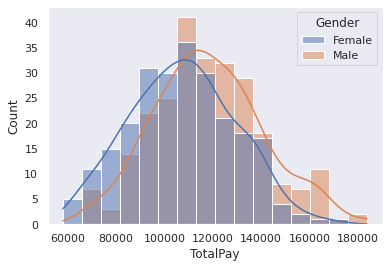

In [77]:
# Visualize the relationship between men and women pay means by age using our new datafram

sns.histplot(x='TotalPay', hue='Gender', data=over41_df, kde=True)

# Findings for Hypothesis Test #2b

*   Reject the null that there is no significant difference in population means between the salary of men and women between the ages of 42-65
*   The difference is significant at p < 0.05
*   With 95% confidence, the difference is between 6,940.09 and 14,736.02


> There is once again a significant difference in salaries between men and women who are between the ages of 42-65.  

> The p-value indicates that there is less than a 5% chance of observing a difference in pay this large, even if there was no difference in the mean pay between men and women.

> With 95% confidence, the true difference in salary between men and women is between 6,940.09 and 14,736.02, with men holding the higher average salary.


A comprehensive look at the correlation between all ages and total pay grouped by gender can be seen in the scatter plot below.  While this visualization shows a trend for salary to increase with age for both men and women, men still tend to earn more in pay than women do across the age range.


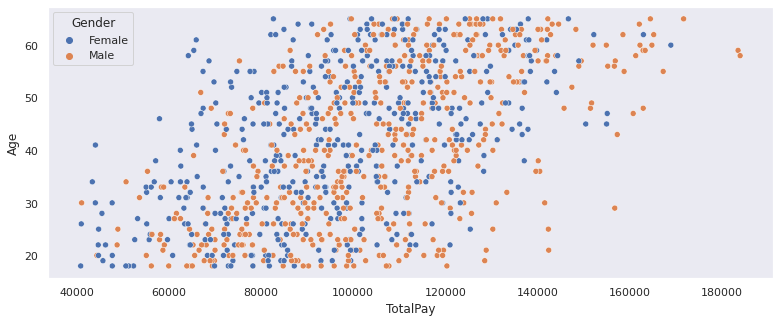

In [83]:
# Full scatterplot including all ages (18-65)

plt.figure(figsize = (13,5))
sns.scatterplot(x='TotalPay', y='Age', hue='Gender', data=df)

# **Conclusion**


In this statistical analysis, I was concerned with observing if there was a significant difference in pay between men and women, as well as the potential imapct of age on pay.  Not only did I find a signficant difference in pay indicating a larger mean income for men compared to women, the income gap also remained in different age groups as well.  All null hypotheses were rejected.


External research has also investigated how age impacts salary differences between men and women.  This research suggests that while women hit their peak income in their early 40's, men continue to build their highest takehome pay well into their 50's.  This observation was paralleled in this dataset as men did not only continue to take in an average higher pay than women in both age groups, but the true difference in salary at a 95% confidence interval resulted in a higher pay range difference in the older ages of 42-65 than I found in the 18-41 age group.  As a base point, the difference in mean pay between men and women regardless of age is 5,429.22 - 11,574.48.  Within the 18-41 ages there is a similar but slightly larger difference in mean pay ranging from 4,503.49 - 11,898.94.  And finally, at the 42-65 ages there is a difference in mean pay ranging from that noticeably increases to 6,940.09 - 14,736.02.  This supports external research suggesting men may continue to build their average pay beyond the age of 42 at which point women's salary has less likelihood to increase.

# Limitations

While this data mirrors other research studies, this dataset and analysis includes limitations.   

1.   This data was limited with a population of only 1,000 individuals.  While the source data did not include any null or missing values, dividing the data into multiple categories (gender and age) greatly affected the population sizes for Hypothesis #2a and #2b, potentially impacting the outcome of the results.

2.   The job titles in this data are varied with no intentionality to the jobs chosen.  The results found here could be skewed by the different jobs and job sectors selected for this data, especially if the average makeup of those jobs are significantly influenced by gender.

2.   This data was scraped from a single source: Glassdoor. The data here is likely pulled from self-reported information, relying heavily on user input.  Glassdoor is not a comprehensive source on salary information, and data gathered by user input has an increased chance in being liable to errors or misrepresentation of the individual. Both factors have the potential to impact the accuracy of the data.

2.   Finally, this dataset is limited in gender representation.  By only including men and women, we are excluding all individuals who exist outside this binary.  In our present social state where self-expression has become a prominent and necessary aspect of identity, a dataset representative of our population must reflect the new and ever-expanding ways with which we continue to identify ourselves. 

# Next Steps and Recommendations

When conducting futher analysis, I recommend finding an alternative source for salary information.  First, this new source should have a greatly expanded population gathered over a number of years (ideally a 10+ year range to increase the scope and representativeness of the study).  Second, this source should also prioritize a more accurate method of data collection for true salary information that is not self-reported, if possible.  And finally, finding a dataset with an expanded option for gender options is imperative.  Utilizing a dataset with a much greater population over a longer period of time would likely allow for large enough populations to conduct significant statistical analysis of salary for those identifying outside the binary. 

Furthermore, additional information regarding a more expansive section on job sectors should be included and addressed in future studies to enable further research on gender pay gaps within specific job fields.  Other information related to pay, including benefits (401k match, health insurance, PTO, etc.) could be explored to observe any gendered differences in the benefits offered or in monetary the value of those benefits.

As more research is conducted, I'm hopeful for the resulting social and public policies created in response to minimize this gap.  Only when we create and fund plans/organizations committed to addressing this significant gap that serves to limit the economic, social, and political freedoms of women (and that continues to expand men's freedoms), can we make positive steps forward in challenging and progressing women's financial status.  And while this research is limited in its gendered approach, we can build on this potential to provide a more nuanced understanding and wholistic account of the salary gap by expanding to financial research between a variety of different genders beyond the well-known divide exclusively between men and women.